In [34]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [14]:
df = pd.read_csv("Ethos_Dataset_Binary.csv")
del df["Unnamed: 0"]

In [15]:
df

,comment,isHate
0,You should know women's sports are a joke,1.0
1,You look like Sloth with deeper Down’s syndrome,1.0
2,You look like Russian and speak like Indian. B...,1.0
3,"Women deserve to be abused, I guess.",1.0
4,Women are made for making babies and cooking d...,1.0
...,...,...
993,From the midnight sun where the hot springs blow,0.0
994,Don't say I'm not your type,0.0
995,And therefore never send to know for whom the...,0.0
996,And I can't stand another day,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  998 non-null    object 
 1   isHate   998 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
df['isHate'].value_counts()

In [11]:
def first_preprocessing(text):
  text = text.lower()
  spec_chars = string.punctuation + '«»\t—…’'
  text = "".join([ch for ch in text if ch not in spec_chars])
  text = re.sub('\n', ' ', text)
  text = "".join([ch for ch in text if ch not in string.digits])
  return text

In [16]:
df['comment'] = df['comment'].apply(first_preprocessing)
df

,comment,isHate
0,you should know womens sports are a joke,1.0
1,you look like sloth with deeper downs syndrome,1.0
2,you look like russian and speak like indian bo...,1.0
3,women deserve to be abused i guess,1.0
4,women are made for making babies and cooking d...,1.0
...,...,...
993,from the midnight sun where the hot springs blow,0.0
994,dont say im not your type,0.0
995,and therefore never send to know for whom the...,0.0
996,and i cant stand another day,0.0


In [22]:
s = ' '.join(df['comment'])
nltk.download('punkt')
text_tokens = word_tokenize(s)
text = nltk.Text(text_tokens)
fdist = FreqDist(text)
fdist.most_common(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('the', 633),
 ('and', 543),
 ('to', 529),
 ('a', 406),
 ('i', 395),
 ('is', 341),
 ('of', 329),
 ('you', 326),
 ('are', 300),
 ('in', 234)]

In [30]:
# nltk.download('stopwords')
# english_stopwords = stopwords.words('english')
# text_tokens = [token.strip() for token in text_tokens if token not in english_stopwords]
# print(text_tokens)
# text = nltk.Text(text_tokens)
# print(text)
# fdist_sw = FreqDist(text)

['know', 'womens', 'sports', 'joke', 'look', 'like', 'sloth', 'deeper', 'downs', 'syndrome', 'look', 'like', 'russian', 'speak', 'like', 'indian', 'disgusting', 'go', 'kill', 'women', 'deserve', 'abused', 'guess', 'women', 'made', 'making', 'babies', 'cooking', 'dinner', 'nothing', 'else', 'havent', 'faggots', 'taken', 'bipill', 'yet', 'dont', 'go', 'beck', 'god', 'murder', 'christianity', 'joke', 'african', 'american', 'monkey', 'hold', 'gun', 'like', 'bulgaria', 'exist', 'country', 'one', 'homosexual', 'ones', 'negroes', 'tear', 'neighborhoods', 'black', 'thug', 'gets', 'killed', 'law', 'enforcement', 'must', 'low', 'iq', 'gives', 'aa', 'fuck', 'shit', 'diamonds', 'jews', 'fuck', 'think', 'cunt', 'wtf', 'stay', 'steady', 'aim', 'head', 'little', 'christian', 'rat', 'white', 'people', 'shit', 'human', 'beings', 'happened', 'good', 'old', 'days', 'freaks', 'exist', 'sewer', 'freaks', 'dragged', 'manufactured', 'group', 'freaks', 'want', 'cut', 'cocks', 'take', 'arse', 'hope', 'world', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
fdist_sw.most_common(10)

[('people', 198),
 ('like', 131),
 ('dont', 83),
 ('white', 74),
 ('get', 74),
 ('women', 69),
 ('fucking', 66),
 ('im', 65),
 ('know', 57),
 ('black', 57)]

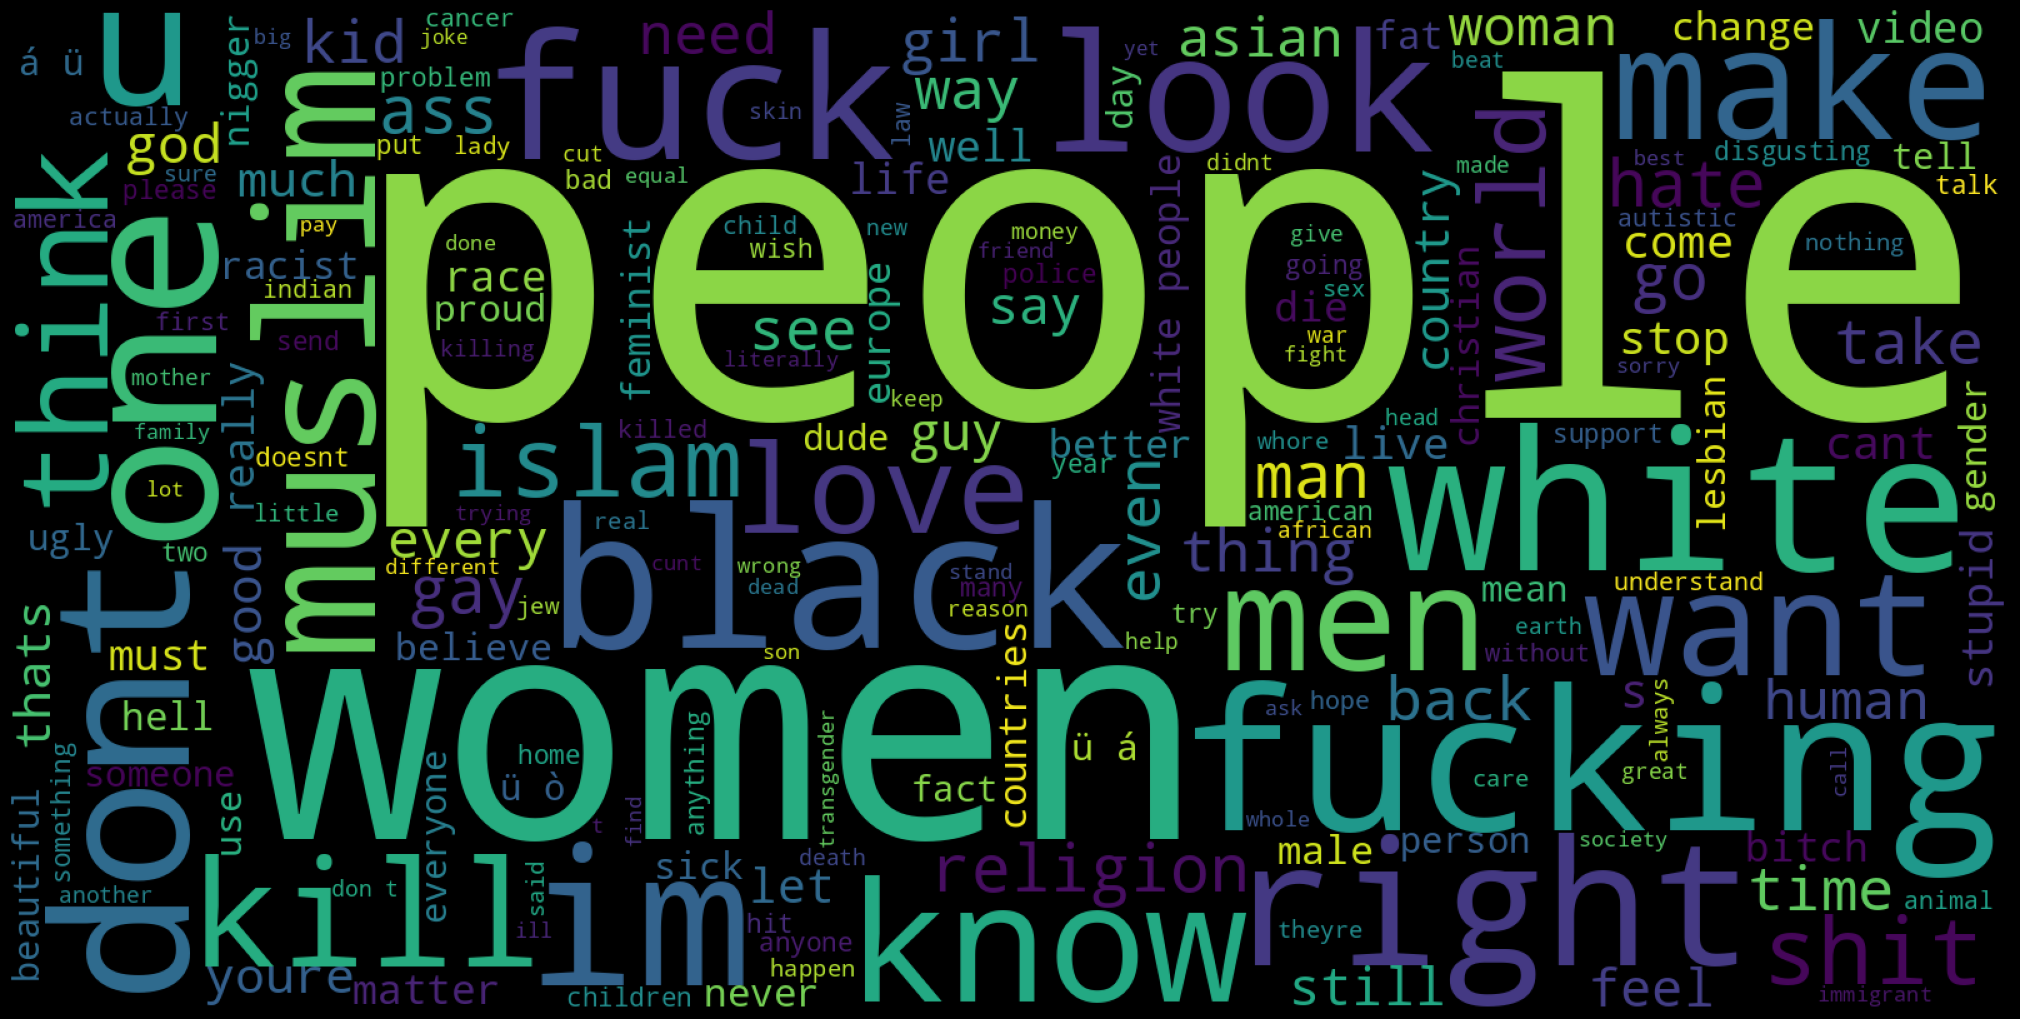

In [28]:
text_raw = " ".join(text)
wordcloud = WordCloud(width=1600, height=800).generate(text_raw)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
def second_preprocessing(text):
  text_tokens = word_tokenize(text)
  text_tokens = [token.strip() for token in text_tokens if token not in english_stopwords]
  return ' '.join(text_tokens)

In [33]:
df['comment'] = df['comment'].apply(second_preprocessing)
df

,comment,isHate
0,know womens sports joke,1.0
1,look like sloth deeper downs syndrome,1.0
2,look like russian speak like indian disgusting...,1.0
3,women deserve abused guess,1.0
4,women made making babies cooking dinner nothin...,1.0
...,...,...
993,midnight sun hot springs blow,0.0
994,dont say im type,0.0
995,therefore never send know bell tolls,0.0
996,cant stand another day,0.0


In [40]:
comments_label_1 = df[df['isHate'] >= 0.5]['comment']
comments_label_0 = df[df['isHate'] < 0.5]['comment']
words_label_1 = [word for comment in comments_label_1 for word in comment.split()]
words_label_0 = [word for comment in comments_label_0 for word in comment.split()]
word_count_label_1 = Counter(words_label_1)
word_count_label_0 = Counter(words_label_0)
print("Самые частые слова для метки 1:")
for word, count in word_count_label_1.most_common(10):
    print(word, count)
print("Самые частые слова для метки 0:")
for word, count in word_count_label_0.most_common(10):
    print(word, count)

Самые частые слова для метки 1:
people 70
like 64
get 42
white 41
fucking 41
fuck 38
women 37
dont 37
kill 35
islam 34
Самые частые слова для метки 0:
people 128
like 67
im 56
dont 46
know 39
one 38
love 36
white 33
women 32
get 32
